##Taller 10: Entrega
Entregar link de de su taller # 10

Realice una nube de palabra sobre cualquier corpus (excepto el que usamos en la clase como ejemplo). Puede subir link de Tableau Public o Jupyter Notebook.

In [1]:
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
from nltk.corpus import stopwords

In [9]:
stopwords= stopwords.words('spanish')

In [10]:
import pandas as pd

In [11]:
!pip install wordcloud

In [12]:
data = pd.read_csv('bob_esponja.csv')
data

,Personaje,Descripción
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor..."
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...
5,Sheldon J. Plankton,"Sheldon J. Plankton, o simplemente Plankton, e..."
6,Karen Plankton,Karen Plankton es uno de los dos principales a...
7,Perlita Cangrejo,"Perla ""Perlita"" Cangrejo es un personaje princ..."
8,Sra. Puff,La Señora Puff es un personaje principal de Bo...
9,Gary el Caracol,Gary el Caracol es un personaje principal de B...


In [13]:
data.Descripción

0    Bob Esponja es una esponja de mar con forma re...
1    Es una estrella de mar de color rosa, el mejor...
2    Calamardo Tentáculos es un personaje principal...
3    Arenita Mejillas (Sandy Cheeks en inglés) en u...
4    Don Eugenio H. Cangrejo (normalmente llamado S...
5    Sheldon J. Plankton, o simplemente Plankton, e...
6    Karen Plankton es uno de los dos principales a...
7    Perla "Perlita" Cangrejo es un personaje princ...
8    La Señora Puff es un personaje principal de Bo...
9    Gary el Caracol es un personaje principal de B...
Name: Descripción, dtype: object

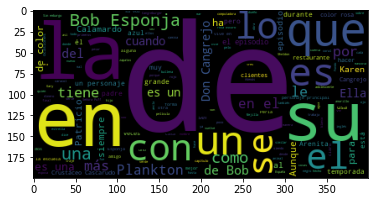

In [14]:
palabras = data.Descripción.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

In [15]:
import re 

stopwords.extend(["y", "la", "en", "que", "tu", "el"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.Descripción.apply(lambda texto: pre_procesado(texto))

data.head()

,Personaje,Descripción,pp
0,Bob Esponja Pantalones Cuadrados,Bob Esponja es una esponja de mar con forma re...,bob esponja esponja mar forma rectangular colo...
1,Patricio Estrella,"Es una estrella de mar de color rosa, el mejor...",estrella mar color rosa mejor amigo bob esponj...
2,Calamardo Tentáculos,Calamardo Tentáculos es un personaje principal...,calamardo tentáculos personaje principal bob e...
3,Arenita Mejillas,Arenita Mejillas (Sandy Cheeks en inglés) en u...,arenita mejillas sandy cheeks inglés personaje...
4,Eugenio H. Cangrejo,Don Eugenio H. Cangrejo (normalmente llamado S...,don eugenio h cangrejo normalmente llamado señ...


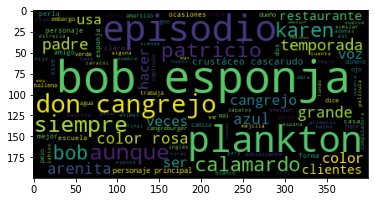

In [16]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

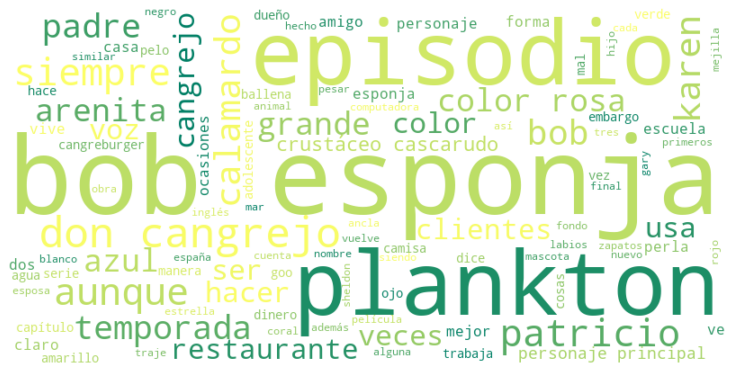

In [17]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="summer",
                      stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

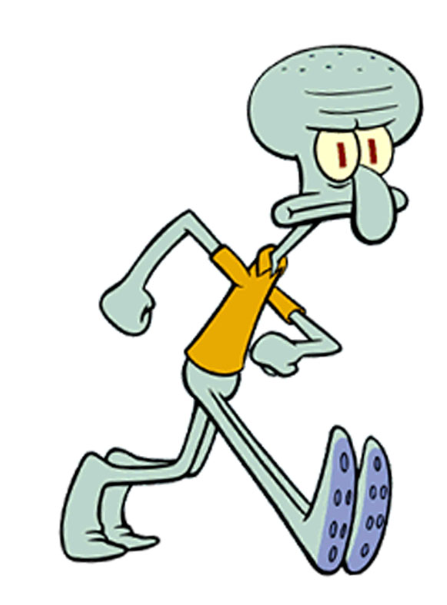

In [22]:
Cal = PIL.Image.open("calamardo.png")
display(Cal)

In [23]:
mask2 = np.array(Cal)

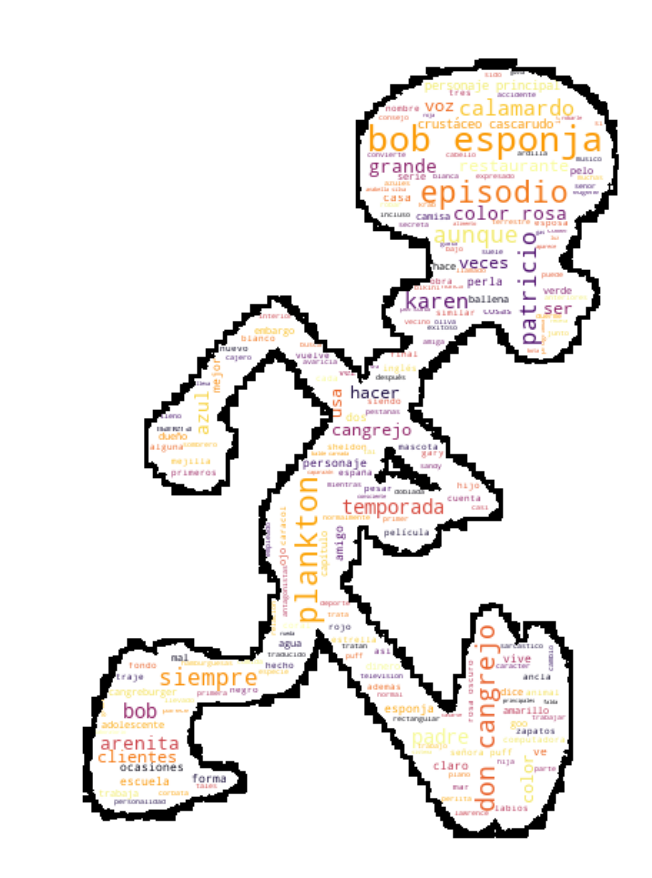

In [26]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=250,
                      background_color="white", colormap='inferno',
                      stopwords=stopwords,
                      mask=mask2, contour_width=4, contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

wordcloud.to_file("calamardo.png")
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()